## 人數統計

In [13]:
import numpy as np
list = [8397,8393,8389,8376,8378,8395,8411,8409,8406,8413,8408,8408,8414,8421,8411,8392,8404]
npArray = np.array(list)
month = 1
year = 106
for v in npArray:
    print(f'民國{year}年{month}月總人數:{v:.1f}')
    if month == 12:
       month = 0  
       year+=1
    month+=1
print(npArray.max())
print(npArray.min())
print(np.median(npArray))
print(np.mean(npArray))

民國106年1月總人數:8397.0
民國106年2月總人數:8393.0
民國106年3月總人數:8389.0
民國106年4月總人數:8376.0
民國106年5月總人數:8378.0
民國106年6月總人數:8395.0
民國106年7月總人數:8411.0
民國106年8月總人數:8409.0
民國106年9月總人數:8406.0
民國106年10月總人數:8413.0
民國106年11月總人數:8408.0
民國106年12月總人數:8408.0
民國107年1月總人數:8414.0
民國107年2月總人數:8421.0
民國107年3月總人數:8411.0
民國107年4月總人數:8392.0
民國107年5月總人數:8404.0
8421
8376
8406.0
8401.470588235294


## 陣列刪除資料
+ 這個動作方法會依照指定的軸 (維度) 與指定的索引的陣列刪除資料。
+ 如果沒有提到軸 (維度)，陣列會以一維方式刪除指定位置資料。
+ Delete( ) 函數需要以下參數：
   + arr：欲刪除資料的陣列。
   + index：刪除資料位置的索引值編號。
   + axis：指定的軸(維度)，如果沒有給這參數，則會變成一維。

In [3]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print( )
b=np.delete(a,3)
print(b)
b=np.delete(a,2)
print(b)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 2 3 5 6 7 8 9]
[1 2 4 5 6 7 8 9]



In [5]:
import numpy as np
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(a)
print( )
c=np.delete(a,1,axis = 0)
print(c)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [7 8 9]]



In [9]:
import numpy as np
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(a)
print( )
c=np.delete(a,1,axis = 1)
print(c)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 3]
 [4 6]
 [7 9]]



## 讀存檔案
+ 可使用 np.loadtxt( ) 方法進行檔案的讀取。
+ 若不需要讀入第一列，可使用 skiprows=1 來忽略第一列。
+ 若我們的資料是利用 ‘,’ 當作資料與資料之間的分格符號，可使用 delimiter=‘ , ’ 設定，預設為空白。
+ 若設定 unpack=True 代表可以將 Column 分別切出來 (預設為False)。
+ 但是，當我們欲要讀的檔案，裡面有遺失值的時候，loadtxt 這個動作將會產生錯誤。loadtxt( ) 必須是在每一 row 都有相同數量的 value 下，才可以使用。
  + 建議改用 genfromtxt( ) 方法 ，它可以針對遺失值進行處理。
  + 參數加上 filling_values 可以把原本缺失的資料補上指定的資料。
+ 可利用 savetxt( ) 將資料存進檔案裡面保存。
+ genfromtxt 可透過 skip_header=1  參數忽略第一列。
+ 碰到遺失值的處理：
  + loadtxt 碰到遺失值會產生錯誤。
  + genfromtxt 碰到遺失值會以 nan 來表示。
+ genfromtxt 進行存取時：
  + 資料預設為浮點數(科學記數法)，所以建議儲存的時候以 fmt 進行格式設定。
  + 開啟時若資料為整數，請加入 dtype 設定為 int。

In [20]:
import numpy as np
x = np.loadtxt('data1.csv',skiprows=1,delimiter=',')
print(x)
y,z = np.loadtxt('data1.csv',skiprows=1,unpack=True,delimiter=',')# 把cloum割出來
print("value1:",y)
print("value2:",z)
q = y[z >= 0.5]
print(q)

[[0.2 0.1]
 [0.4 0.5]
 [0.1 0.6]
 [0.1 0.3]
 [0.7 0.3]]
value1: [0.2 0.4 0.1 0.1 0.7]
value2: [0.1 0.5 0.6 0.3 0.3]
[0.4 0.1]


## 碰到遺失值的處理

In [21]:
import numpy as np
x = np.loadtxt('data2.csv',skiprows=1, delimiter=',')
print(x)
y, z = np.loadtxt('data2.csv',skiprows=1,unpack=True, delimiter=',')
print("Value1=",y)
print("Value2=",z)

ValueError: could not convert string to float: ''

In [27]:
import numpy as np
a = np.genfromtxt('data2.csv',delimiter=',',skip_header=1)
print(a)
#help(np.savetxt) #查看文件
np.savetxt('data1a.csv', a, delimiter=',',fmt='%1.4f') #存檔
# filling_values 設定缺少數值要填入的內容
b = np.genfromtxt('data2.csv',delimiter=",",skip_header=1,filling_values=0.001)
print(b)
np.savetxt('data1b.csv',b,delimiter=',')

[[0.2 0.1]
 [0.4 nan]
 [0.1 0.6]
 [0.1 0.3]
 [nan 0.3]]
[[0.2   0.1  ]
 [0.4   0.001]
 [0.1   0.6  ]
 [0.1   0.3  ]
 [0.001 0.3  ]]


## 範圍與百分位數
+ np.ptp( ) 計算最大與最小值的差（最大 -(減) 最小）。
+ np.percentile( ) 方法代表百分位數，用於統計數據的度量指標，需要三個參數：
  + array：陣列。
  + percent：計算的百分位數，介於 0 到 100 之間。
  + axis：進行計算的軸。
+ 百分位數是一種位置量數，有助於瞭解資料在最小值與最大值之間的分布情況。
+ p- 百分位數表示：
  + 至少有 p-百分比 (p%) 的觀察值小於或者等於他。
  + 至少有 (100-p)% 的觀察值大於或等於他。
+ 計算方式：
  + 將資料由小到大排序。
  + 計算 i=(p%*樣本數) 之位置。
  + 於 i 位置：
    + a. 若不是整數，無條件進位取比 i 大的下一個整數位置的值。
    + b. 若為整數，則由 i 與 i+1 兩個位置上的值取平均。

## np.ptp( ) 計算最大與最小值的差（最大 -(減) 最小）。

In [28]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print()
print("---------------")
print(np.ptp(a))# 90-0
b=np.ptp(a, axis = 0)# [60-0,75-30,90-45]
print(b)
print("---------------")
b=np.ptp(a, axis = 1)#[45 -0,90-60]
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]

---------------
90
[60 45 45]
---------------
[45 30]
---------------


## np.percentile
+ np.percentile( ) 方法代表百分位數，用於統計數據的度量指標，需要三個參數：
  + array：陣列。
  + percent：計算的百分位數，介於 0 到 100 之間。
  + axis：進行計算的軸。
+ 百分位數是一種位置量數，有助於瞭解資料在最小值與最大值之間的分布情況。
+ p- 百分位數表示：
  + 至少有 p-百分比 (p%) 的觀察值小於或者等於他。
  + 至少有 (100-p)% 的觀察值大於或等於他。
+ 計算方式：
  + 將資料由小到大排序。
  + 計算 i=(p%*樣本數) 之位置。
  + 於 i 位置：
    + a. 若不是整數，無條件進位取比 i 大的下一個整數位置的值。
    + b. 若為整數，則由 i 與 i+1 兩個位置上的值取平均。

In [29]:
import numpy as np

arry = np.array([4,6,10,12,8])
#                           1 2 3  4 5 
# 注意percentile會在內部排序 4 6 8 10 12
# n是長度
# 位置=1+(n-1)*p n是元素 p是百分比 
#以下案例是:n=5 p=50
"""
1+(5-1)*0.5 = 3
正好落在 index為3的位置 答案是8
"""
b = np.percentile(arry, 50) 
print("The percentile is:",b)

a = np.array([[11, 8, 9], [5, 4, 1]])
#以下案例是:n=5 p=25
# 1 2 3 4 5 6
# 1 4 5 8 9 11
"""
先算出位置:
1+(6-1)X0.25 = 2.25
因為落在2.25所以index為2與3之間的數值
2.25的小數部分取出 0.25 所以下列公式乘上0.25
4 + (5-4) * 0.25  = 4.25
"""
b = np.percentile(a, 25)
print("The percentile is:",b) 
"""
[11,8,9]
[5,4,1]
先算出位置:
因為axis=0 所以是垂直計算
1+(2-1) * 0.5 = 1.5 
計算出的index是1.5
1.5正好落在1與2之間 取出index:1與index:2的數做計算
1.5的小數部分取出 0.5 所以乘上0.5
(11-5) * 0.5 + 5 = 8
"""
b = np.percentile(a, 50,axis=0)
print("The percentile is:",b)
"""
[11,8,9]
[5,4,1]

8 9 11
1 4  5 

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2 
正好 index:2 所以9

先算出位置:
因為axis=1 所以是水平計算
1+(3-1) x 0.5 = 2
正好 index:2 所以4
 

"""

b = np.percentile(a, 50,axis=1)
print("The percentile is:",b)

The percentile is: 8.0
The percentile is: 4.25
The percentile is: [8. 6. 5.]
The percentile is: [9. 4.]


## 變異數與標準差
+ 變異數代表所有資料到平均數的距離之平方。
+ 標準差代表變異數開平方根，也就是可依此表示資料的分散程度。
+ var( ) 代表由陣列取得變異數的方法。
+ std( ) 代表由陣列取得標準差的方法。

In [32]:
import math
import numpy as np
a = np.array([1,2,3,4])
print(a)
# 1+2+3+4 = 10
# 10/4=2.5 平均值為2.5
mean = a.mean()
print("========MEAN========")
print(mean)
var = ((a - mean)**2).mean()#numpy 作法
#(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2 /4
#var = ((1-2.5)**2 + (2-2.5) **2 + (3-2.5)**2 + (4-2.5)**2) /4 #python的寫法
print("========VAR========")
print(var)#變異數
b = np.var(a)#變異數
print(b)
print("========STD========")
print(math.sqrt(var))#標準差
b=np.std(a)#標準差
print(b)


[1 2 3 4]
========MEAN========
2.5
========VAR========
1.25
1.25
========STD========
1.118033988749895
1.118033988749895


## 累加與累差
+ np.cumsum( ) 方法進行指定軸資料的累加。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸則會平坦化後進行累加
+ 維持原有的資料數量，且在計算結果上進行下一個計算。
+ np.diff( ) 方法進行指定軸資料的累差。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸預設 axis 為 1
+ 以原資料進行資料內容刪除，若 axis 為 0 則減少一個 row，若 axis 為 1 減少一個 column。


### 累加

In [33]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9], 
              [12, 24, 36]])
print(a)
print(np.cumsum(a))
print("---------------")
print(np.cumsum(a,axis=0))
print("---------------")
print(np.cumsum(a,axis=1))
print("---------------")

[[ 1  2  3]
 [13  6  9]
 [12 24 36]]
[  1   3   6  19  25  34  46  70 106]
---------------
[[ 1  2  3]
 [14  8 12]
 [26 32 48]]
---------------
[[ 1  3  6]
 [13 19 28]
 [12 36 72]]
---------------


### 累差

In [35]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9]])
print(a)
print(np.diff(a))#預設axis=1
print("---------------")
print(np.diff(a,axis=0))#[13-1,6-2,9-3]
print("---------------")
print(np.diff(a,axis=1))#[2-1,3-2]
                        #[6-13,9-6]
print("---------------")

[[ 1  2  3]
 [13  6  9]]
[[ 1  1]
 [-7  3]]
---------------
[[12  4  6]]
---------------
[[ 1  1]
 [-7  3]]
---------------


## 讀取檔案-有遺失值與儲存

[dtype](https://www.tutorialspoint.com/numpy/numpy_data_types.htm)

In [44]:
import numpy as np
a = np.genfromtxt('data4.csv',dtype='uint16',delimiter=',',skip_header=1,encoding='utf-8')
print(a)
print(a.dtype)

[[ 106    1 8397  364  209  291  398  516  524  630  633  608  615  713
   648  584  509  308  304  298  171   58   15    1]
 [ 106    2 8393  359  210  293  394  513  524  624  636  599  630  709
   649  584  515  303  302  300  174   59   15    1]
 [ 106    3 8389  353  219  283  397  509  530  617  635  602  636  707
   643  585  517  304  307  297  174   59   14    1]
 [ 106    4 8376  349  211  277  395  511  532  614  641  603  635  699
   647  586  519  304  305  297  175   61   14    1]
 [ 106    5 8378  352  218  273  395  512  526  610  642  602  638  687
   652  594  518  305  307  298  172   61   15    1]
 [ 106    6 8395  352  225  271  393  516  529  612  642  603  629  693
   656  597  516  308  306  297  174   59   16    1]
 [ 106    7 8411  363  220  276  387  518  529  611  650  602  619  699
   652  606  521  305  308  294  174   60   16    1]
 [ 106    8 8409  362  222  277  380  515  533  605  649  608  615  705
   646  607  529  301  309  295  177   57   16    1]


# Numpy查找資料與Copy

## 查找資料條件與回傳
+ np.where( ) 方法將會返回輸入陣列中滿足設定的條件之元素索引：
  + np.where(陣列查找資料條件)
  + 傳回值是符合條件的欄位索引值
+ np.extract( ) 方法將會返回滿足任何條件的元素：
  + np.extract(陣列查找資料條件,陣列)
  + 傳回值是符合條件的欄位內容

## where 與 extract

In [57]:
import numpy as np
a = np.array([0,30,45,60,75,90])
print(a > 15)
print("===================")
b = np.where(a > 15)
print(b)
print (a[b])
print (a[a > 15])
print("===================")
condition = (np.mod(a,2) == 0)
print(condition)
print("===================")
b = np.where(condition) # 回傳符合條件的index
print(b)
print (a[b])
print(np.extract(condition, a))

[False  True  True  True  True  True]
(array([1, 2, 3, 4, 5], dtype=int64),)
[30 45 60 75 90]
[30 45 60 75 90]
[ True  True False  True False  True]
(array([0, 1, 3, 5], dtype=int64),)
[ 0 30 60 90]
[ 0 30 60 90]


## 陣列複製
+ 陣列指派拷貝：若以指派的方式將陣列交給另外一個，這兩個陣列的記憶體位址會是相同，兩個的資料變化與形狀變化會是相同。
+ 陣列淺層拷貝：若以 view( ) 方式將陣列交給另外一個，將形狀複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，但兩個的資料變化相同。
+ 陣列深層拷貝：若以 copy( ) 方式將陣列交給另外一個，則會將形狀與資料複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，兩個的資料變化也不同。


### 無copy的情況

In [58]:
import numpy as np
a = np.arange(6)
print(a)
print("========================")
print(id(a))
b = a
print("========================")
print(b)
print("========================")
print(id(b))
print("========================")
b.shape = 3,2
print(b)
print("========================")
print(a)
b[0,0] = 100
print("========================")
print(a)

[0 1 2 3 4 5]
2455472284944
[0 1 2 3 4 5]
2455472284944
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[100   1]
 [  2   3]
 [  4   5]]


### View

In [60]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("========================")
b = a.view( )
print(b)
print(id(b))
print("========================")
b.shape = 3,2
print(b) # b shape變
print(a) # a shape不變
print("========================")
b[0,0] = 100 # b改了 a會變
print(a) # 

[0 1 2 3 4 5]
2455472285520
[0 1 2 3 4 5]
2455472286384
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[100   1   2   3   4   5]


## 陣列複製

In [62]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("========================")
b = a.copy( )
print(b)
print(id(b))
print("========================")
b.shape = 3,2
print(b)
print(a)
print("========================")
b[0,0] = 100
print(b)
print(a) 

[0 1 2 3 4 5]
2455472284752
[0 1 2 3 4 5]
2455472285712
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[[100   1]
 [  2   3]
 [  4   5]]
[0 1 2 3 4 5]


## 繪製圖表
+ 請先引用 matplotlib 套件：
  + import matplotlib.pyplot as plt
+ 只有繪製折線圖可使用 plt.plot( ) 方法繪製。
+ 若 plot( ) 方法內只有一個參數，預設為 y 軸資料，x 軸為預設整數值。
+ 若 plot( ) 方法內有兩個參數，代表 x 軸與 y 軸座標，若為四個參數，代表兩條曲線。
+ 最後顯示出圖片請加上 .show( ) 方法。

## 圖表基本區塊!
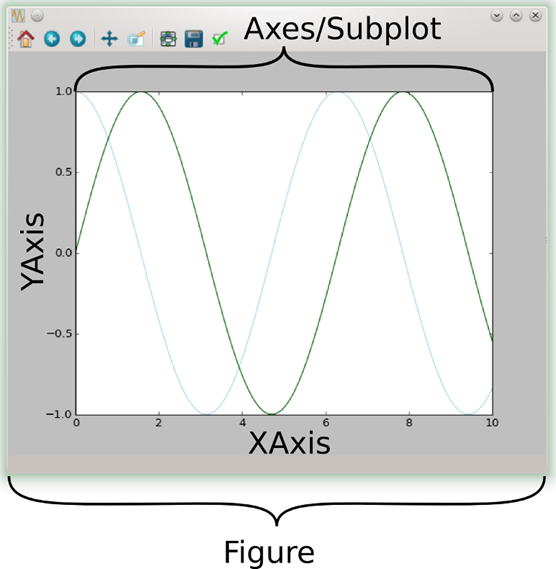

### figure 可加入參數
+ plt.figure( ) 方法會建立一個圖像，該代碼後的所有圖像會繪製到這個圖像中，一個項目中可以添加多個  figure，常用參數如下：
 + num：設置圖像的序號，不設置該參數，自動默認編號。
 + figsize：設置圖像大小。
 + facecolor：圖像前景色。

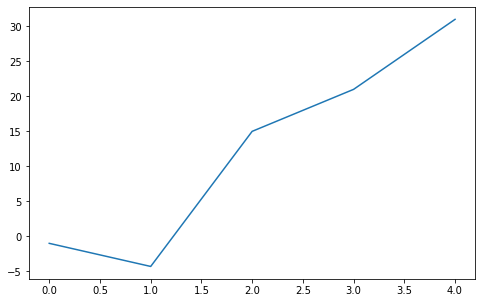

In [63]:
import matplotlib.pyplot as plt
data = [-1, -4.3, 15, 21, 31]
plt.figure(num=3, figsize=(8, 5))
plt.plot(data) 
plt.show( )

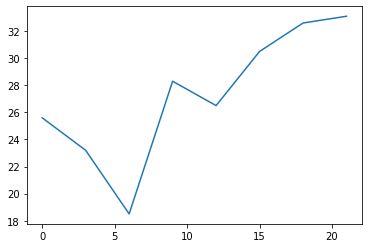

In [64]:
import  matplotlib.pyplot  as  plt
x1 = range(0, 22, 3)
y1 = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]
plt.plot(x1, y1)
plt.show( )